In [1]:
import sys
print('iPython Kernel -->', sys.argv)
print('Environment -->', sys.prefix)

iPython Kernel --> ['C:\\anaconda3\\envs\\ling\\lib\\site-packages\\ipykernel_launcher.py', '-f', 'C:\\Users\\Babak Ravandi\\AppData\\Roaming\\jupyter\\runtime\\kernel-7896f591-cc3e-4b8d-b15b-28ac25f31606.json']
Environment --> C:\anaconda3\envs\ling


In [2]:
import pandas as pd
import numpy as np
import json
from collections import OrderedDict 

import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

import random

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import networkx as nx
import GraphHierarchy as gh
import matplotlib.ticker as tck
from tqdm import tqdm

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_colwidth', 0)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

%matplotlib inline

In [3]:
import os
from pandas import ExcelWriter


def save_xls(dfs_dict, xls_path, open=False):
    if type(dfs_dict) is not dict:
        dfs_dict = {'sheet1': dfs_dict}
    
    with ExcelWriter(xls_path) as writer:
        for df_name, df in dfs_dict.items():
            df.to_excel(writer, df_name)
        writer.save()

    if open is True:
        os.system('start EXCEL.EXE "{}"'.format(os.path.abspath(xls_path)))
    pass

# Load Networks

## Check Mistake Duplicate Edges & Add Frequency

THe only exception of having multiple interactions between a source and target is in 17th century as below. ALl other centuries must have only a single interaction (type of edge) between two nodes.

Source:'PR ze'	 |	Target: 'IV werden'   |   Interactions: {PP, VP}

In [4]:
path_dataset_dir = "D:/GoogleDrive/Research/Linguistic project/German/data/"

In [13]:
# cent_df = (
#         cent_df.groupby(['Source', 'Target'])
#         .agg({
#             'Interaction': lambda x: set([v.upper() for v in x]),
#             'frequency': np.size,
#          })
#         .reset_index()
#     )
cent_df['Interaction'].unique()

array(['VP', 'PP', 'NP', nan, 'AJ'], dtype=object)

In [18]:
save_freq_files = False 

path_networks_NO_FREQ = OrderedDict()

path_networks_NO_FREQ['11'] = "/01 Mittelhochdeutsch middle high/11_cent.xlsx" 
path_networks_NO_FREQ['12'] = "/01 Mittelhochdeutsch middle high/12_cent.xlsx"
path_networks_NO_FREQ['13'] = "/01 Mittelhochdeutsch middle high/13_cent.xlsx"
path_networks_NO_FREQ['E14'] = "/01 Mittelhochdeutsch middle high/14E_cent.xlsx" # Early

path_networks_NO_FREQ['L14'] = '/02 Fruhneuhochdeutsch early new high/14L_cent.xlsx' # Late
path_networks_NO_FREQ['15'] = '/02 Fruhneuhochdeutsch early new high/15_cent.xlsx'
path_networks_NO_FREQ['16'] = '/02 Fruhneuhochdeutsch early new high/16_cent.xlsx'
path_networks_NO_FREQ['17'] = '/02 Fruhneuhochdeutsch early new high/17_cent.xlsx'

cent_interaction_validate = {}

for cent, path_net in path_networks_NO_FREQ.items():

#     path_net = path_networks['15']
    print('------------ Cent:', cent, ' Path:', path_net)

    cent_df = pd.read_excel( path_dataset_dir + path_net)

    cent_df.loc[:, ['Source', 'Target', 'Interaction']] = (
        cent_df.loc[:, ['Source', 'Target', 'Interaction']].apply(lambda x: x.str.strip(), axis=1)
    ) 

    
    """"""
    G=nx.from_pandas_edgelist(
        cent_df, source='Source', target='Target', 
        edge_attr=True, create_using=nx.DiGraph()
    )
    
    # nx.draw(G, with_labels=True)
    # print(type(G))
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)

    print('num edges in excel:', len(cent_df), ' num network edges:', G.number_of_edges())
    """"""

    cent_df['frequency'] = cent_df['Interaction']

    cent_df = (
        cent_df.groupby(['Source', 'Target'])
        .agg({
            'Interaction': lambda x: set([v.upper() for v in x]),
            'frequency': np.size,
         })
        .reset_index()
    )

    cent_df['Interaction count'] = cent_df['Interaction'].apply(len)

    # print(path_net)
    cent_df = cent_df.sort_values(by=['Interaction count', 'frequency'], ascending=False)

    if save_freq_files:
        path_export = (path_dataset_dir + path_net)[:-5] + '_freq.xlsx'
        print('   EXPORTED -->', path_export)
        cent_df.to_excel(path_export)
    
    cent_interaction_validate[cent] = cent_df[cent_df['Interaction count'] > 1]
    
    print(
        'Interaction count > 1 -->', len(cent_interaction_validate[cent])
    )

------------ Cent: 11  Path: /01 Mittelhochdeutsch middle high/11_cent.xlsx
num edges in excel: 972  num network edges: 732
   EXPORTED --> D:/GoogleDrive/Research/Linguistic project/German/data//01 Mittelhochdeutsch middle high/11_cent_freq.xlsx
Interaction count > 1 --> 0
------------ Cent: 12  Path: /01 Mittelhochdeutsch middle high/12_cent.xlsx
num edges in excel: 1204  num network edges: 813
   EXPORTED --> D:/GoogleDrive/Research/Linguistic project/German/data//01 Mittelhochdeutsch middle high/12_cent_freq.xlsx
Interaction count > 1 --> 0
------------ Cent: 13  Path: /01 Mittelhochdeutsch middle high/13_cent.xlsx
num edges in excel: 2507  num network edges: 1348
   EXPORTED --> D:/GoogleDrive/Research/Linguistic project/German/data//01 Mittelhochdeutsch middle high/13_cent_freq.xlsx
Interaction count > 1 --> 1
------------ Cent: E14  Path: /01 Mittelhochdeutsch middle high/14E_cent.xlsx
num edges in excel: 2345  num network edges: 1346
   EXPORTED --> D:/GoogleDrive/Research/Ling

In [20]:
print('Only two nodes with multiple edges!')
cent_interaction_validate['17']

Only two nodes with multiple edges!


,Source,Target,Interaction,frequency,Interaction count
2287,PR ze,IV werden,"{PP, VP}",6,2


## Load Corrected Nets with Freq

In [21]:
path_networks = OrderedDict()


path_networks['11'] = "/01 Mittelhochdeutsch middle high/11_cent_freq.xlsx" 
path_networks['12'] = "/01 Mittelhochdeutsch middle high/12_cent_freq.xlsx"
path_networks['13'] = "/01 Mittelhochdeutsch middle high/13_cent_freq.xlsx"
path_networks['E14'] = "/01 Mittelhochdeutsch middle high/14E_cent_freq.xlsx" # Early

path_networks['L14'] = '/02 Fruhneuhochdeutsch early new high/14L_cent_freq.xlsx' # Late
path_networks['15'] = '/02 Fruhneuhochdeutsch early new high/15_cent_freq.xlsx'
path_networks['16'] = '/02 Fruhneuhochdeutsch early new high/16_cent_freq.xlsx'
path_networks['17'] = '/02 Fruhneuhochdeutsch early new high/17_cent_freq.xlsx'

path_networks

OrderedDict([('11', '/01 Mittelhochdeutsch middle high/11_cent_freq.xlsx'),
             ('12', '/01 Mittelhochdeutsch middle high/12_cent_freq.xlsx'),
             ('13', '/01 Mittelhochdeutsch middle high/13_cent_freq.xlsx'),
             ('E14', '/01 Mittelhochdeutsch middle high/14E_cent_freq.xlsx'),
             ('L14',
              '/02 Fruhneuhochdeutsch early new high/14L_cent_freq.xlsx'),
             ('15', '/02 Fruhneuhochdeutsch early new high/15_cent_freq.xlsx'),
             ('16', '/02 Fruhneuhochdeutsch early new high/16_cent_freq.xlsx'),
             ('17',
              '/02 Fruhneuhochdeutsch early new high/17_cent_freq.xlsx')])

In [22]:
cent_nets = OrderedDict()
syntactic_nets = []

for cent, path_net in path_networks.items():
    print('------- cent:', cent)
    
    cent_df = pd.read_excel( path_dataset_dir + path_net).drop(columns='Unnamed: 0')
    
    cent_df['Source'] = cent_df['Source'].str.lower().apply(lambda x: x.split(' ')[0].upper() + ' ' + ' '.join(x.split(' ')[1:]))
    cent_df['Target'] = cent_df['Target'].str.lower().apply(lambda x: x.split(' ')[0].upper() + ' ' + ' '.join(x.split(' ')[1:]))
    
    cent_df.loc[:, 'Source':'Target'] = cent_df.loc[:, 'Source':'Target'].apply(
        lambda x: x.str.strip())
    
#     print(cent_df.columns)
    G = nx.from_pandas_edgelist(
        cent_df, 
        source='Source', 
        target='Target', 
        edge_attr=True,
#         edge_attr=['Interaction', 'frequency', 'Interaction count'], 
#         Created a directed graph
        create_using=nx.DiGraph()
    )
    
    cent_df['cent'] = cent
    syntactic_nets.append(cent_df)
    
    print('n:', G.number_of_nodes(), 'e:', G.number_of_edges())
    
    cent_nets[cent] = G
    pass

syntactic_nets = pd.concat(syntactic_nets).reset_index(drop=True)

------- cent: 11
n: 420 e: 730
------- cent: 12
n: 440 e: 813
------- cent: 13
n: 703 e: 1343
------- cent: E14
n: 697 e: 1346
------- cent: L14
n: 760 e: 1604
------- cent: 15
n: 735 e: 1428
------- cent: 16
n: 1195 e: 2461
------- cent: 17
n: 1568 e: 3081


In [23]:
if False:
    path_syntactic_nets = path_dataset_dir + 'syntactic_nets_german.xlsx'
    print(path_syntactic_nets)
    syntactic_nets.to_excel(path_syntactic_nets)
    pass

D:/GoogleDrive/Research/Linguistic project/German/data/syntactic_nets_german.xlsx


In [24]:
nodes_all_cent = set(syntactic_nets['Source']).union(set(syntactic_nets['Target']))

[n for n in nodes_all_cent if 'werden' in n]

['PCPS werden', 'AX werden', 'V werden', 'IV werden']

### Validation | TODO FIX!!!

In [34]:
'''
TODO FIX!
The ones with count = 1 seems to have an issue
'''

cent_interaction_count = syntactic_nets.groupby(['cent', 'Interaction']).agg(count = ('Interaction', np.size))
if False:
    cent_interaction_count.to_excel('cent_interaction_count.xlsx')
    pass

cent_interaction_count

count
cent Interaction           
11   {'NP'}           166  
     {'PP'}           81   
     {'VP'}           485  
12   {'AJ'}           1    
     {'NP'}           199  
     {'PP'}           79   
     {'VP'}           534  
13   {'AJ'}           1    
     {'NP', 'EMPTY'}  1    
     {'NP'}           321  
     {'PP'}           178  
     {'VP'}           847  
15   {'NP'}           370  
     {'PP'}           141  
     {'VP'}           917  
16   {'NP'}           664  
     {'PP'}           315  
     {'VP'}           1482 
17   {'NP'}           892  
     {'NS'}           1    
     {'PP', 'VP'}     1    
     {'PP'}           416  
     {'V'}            1    
     {'VP'}           1770 
E14  {'AR'}           1    
     {'NP'}           338  
     {'NS'}           1    
     {'PP'}           119  
     {'VP'}           887  
L14  {'NP'}           455  
     {'NS'}           1    
     {'PP'}           171  
     {'VP'}           977

In [35]:
G.get_edge_data('AX werden','PP er')
# cent_df
# pd.read_excel( path_dataset_dir + path_net)
# path_dataset_dir + path_net

{'Interaction': "{'VP'}", 'frequency': 92, 'Interaction count': 1}

# Analysis of Hirearchy

- using Graph Hierarchy https://github.com/shuaib7860/GraphHierarchy

## Nodal Measures: Hirearchichal Levels
- Hierarchical levels is a generalisation of the notion of trophic levels and describes each vertex’s rank with respect to
“enegry” or “information” flow.
- Influence centrality is a measure of a vertex’s ability to influence the long term state of the graph.
- The democracy coefficient measures the feedback that is present in the graph.
- The hierarchical incoherence parameter is a straightforward generalisation of trophic incoherence.

In [222]:
# tmp = gh.forward_influence_centrality(cent_nets['11'], weight='frequency')
# # tmp = gh.hierarchical_levels(cent_nets['11'], weight='frequency')
# tmp = gh.forward_influence_centrality(cent_nets['11'], weight='frequency')
# tmp = gh.forward_hierarchical_incoherence(cent_nets['11'], weight='frequency')
# tmp

In [37]:
h_measures_df = []

for cent, G in tqdm(cent_nets.items()):
    
    tmp_df = pd.concat([
            
            pd.Series(
                list(G.nodes), 
                name='node'
            ),
        
            pd.Series(
                gh.hierarchical_levels(G, weight='frequency'), 
                name='hierarchical_levels'
            )
        ], axis=1
    )
    
    tmp_df['cent'] = cent
    
    f_hierarchical_levels, f_influence_centrality, f_hierarchical_diff_adj_sparse, f_democracy_coefficient, f_hierarchical_incoherence = gh.forward_hierarchical_metrics(G, weight='frequency')
    
    b_hierarchical_levels, b_influence_centrality, b_hierarchical_diff_adj_sparse, b_democracy_coefficient, b_hierarchical_incoherence = gh.backward_hierarchical_metrics(G, weight='frequency')
    
    tmp_df['f_hierarchical_levels'] = f_hierarchical_levels
    tmp_df['b_hierarchical_levels'] = b_hierarchical_levels
    
    tmp_df['f_influence_centrality'] = f_influence_centrality
    tmp_df['b_influence_centrality'] = b_influence_centrality
    
    tmp_df['f_democracy_coefficient'] = f_democracy_coefficient
    tmp_df['b_democracy_coefficient'] = b_democracy_coefficient
    
    tmp_df['f_hierarchical_incoherence'] = f_hierarchical_incoherence
    tmp_df['b_hierarchical_incoherence'] = b_hierarchical_incoherence
    
    
    h_measures_df.append(tmp_df)
    
    pass
    
h_measures_df = pd.concat(h_measures_df).reset_index(drop=True)
len(h_measures_df)

cent_to_num = {
    '11': 11.0, '12': 12.0, '13': 13.0, 'E14': 14.1, 'L14': 14.2, '15': 15.0, '16': 16.0, '17': 17.0
}

h_measures_df['cent_num'] = h_measures_df['cent'].map(cent_to_num)
# cent_to_num

h_measures_df

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:29<00:00,  3.67s/it]


,node,hierarchical_levels,cent,f_hierarchical_levels,b_hierarchical_levels,f_influence_centrality,b_influence_centrality,f_democracy_coefficient,b_democracy_coefficient,f_hierarchical_incoherence,b_hierarchical_incoherence,cent_num
0,AX werden,-1.322059,11,-1.678203,0.965916,1.000000e+00,9.098386e-10,1.098341e-07,-1.298933e-07,0.533920,0.763671,11.0
1,PP er,0.488087,11,-0.438014,-1.414188,-8.978796e-09,-2.192297e-05,1.098341e-07,-1.298933e-07,0.533920,0.763671,11.0
2,AX sin,-1.695372,11,-2.319056,1.071687,1.000000e+00,-1.146232e-08,1.098341e-07,-1.298933e-07,0.533920,0.763671,11.0
3,PCPS werden,-1.138701,11,-1.319056,0.958345,-5.256178e-07,-8.508693e-09,1.098341e-07,-1.298933e-07,0.533920,0.763671,11.0
4,V werden,-0.895725,11,-1.276866,0.514583,1.000000e+00,-4.383868e-07,1.098341e-07,-1.298933e-07,0.533920,0.763671,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6513,AJ unein,-0.285393,17,-0.578413,-0.007627,-1.425639e-07,1.000000e+00,7.258097e-07,7.384140e-07,0.604803,0.773098,17.0
6514,AJ ungedultig,-0.285393,17,-0.578413,-0.007627,-1.425639e-07,1.000000e+00,7.258097e-07,7.384140e-07,0.604803,0.773098,17.0
6515,AJ unlustig,-0.285393,17,-0.578413,-0.007627,-1.425639e-07,1.000000e+00,7.258097e-07,7.384140e-07,0.604803,0.773098,17.0
6516,N gleich,-0.285393,17,-0.578413,-0.007627,-1.425639e-07,1.000000e+00,7.258097e-07,7.384140e-07,0.604803,0.773098,17.0


In [59]:
if True:
    h_measures_df.to_excel(path_dataset_dir + 'hierarchical_metrics_german.xlsx')

In [39]:
print(h_measures_df['cent'].value_counts())
h_measures_df.columns

17     1568
16     1195
L14    760 
15     735 
13     703 
E14    697 
12     440 
11     420 
Name: cent, dtype: int64


Index(['node', 'hierarchical_levels', 'cent', 'f_hierarchical_levels',
       'b_hierarchical_levels', 'f_influence_centrality',
       'b_influence_centrality', 'f_democracy_coefficient',
       'b_democracy_coefficient', 'f_hierarchical_incoherence',
       'b_hierarchical_incoherence', 'cent_num'],
      dtype='object')

8it [00:06,  1.15it/s]


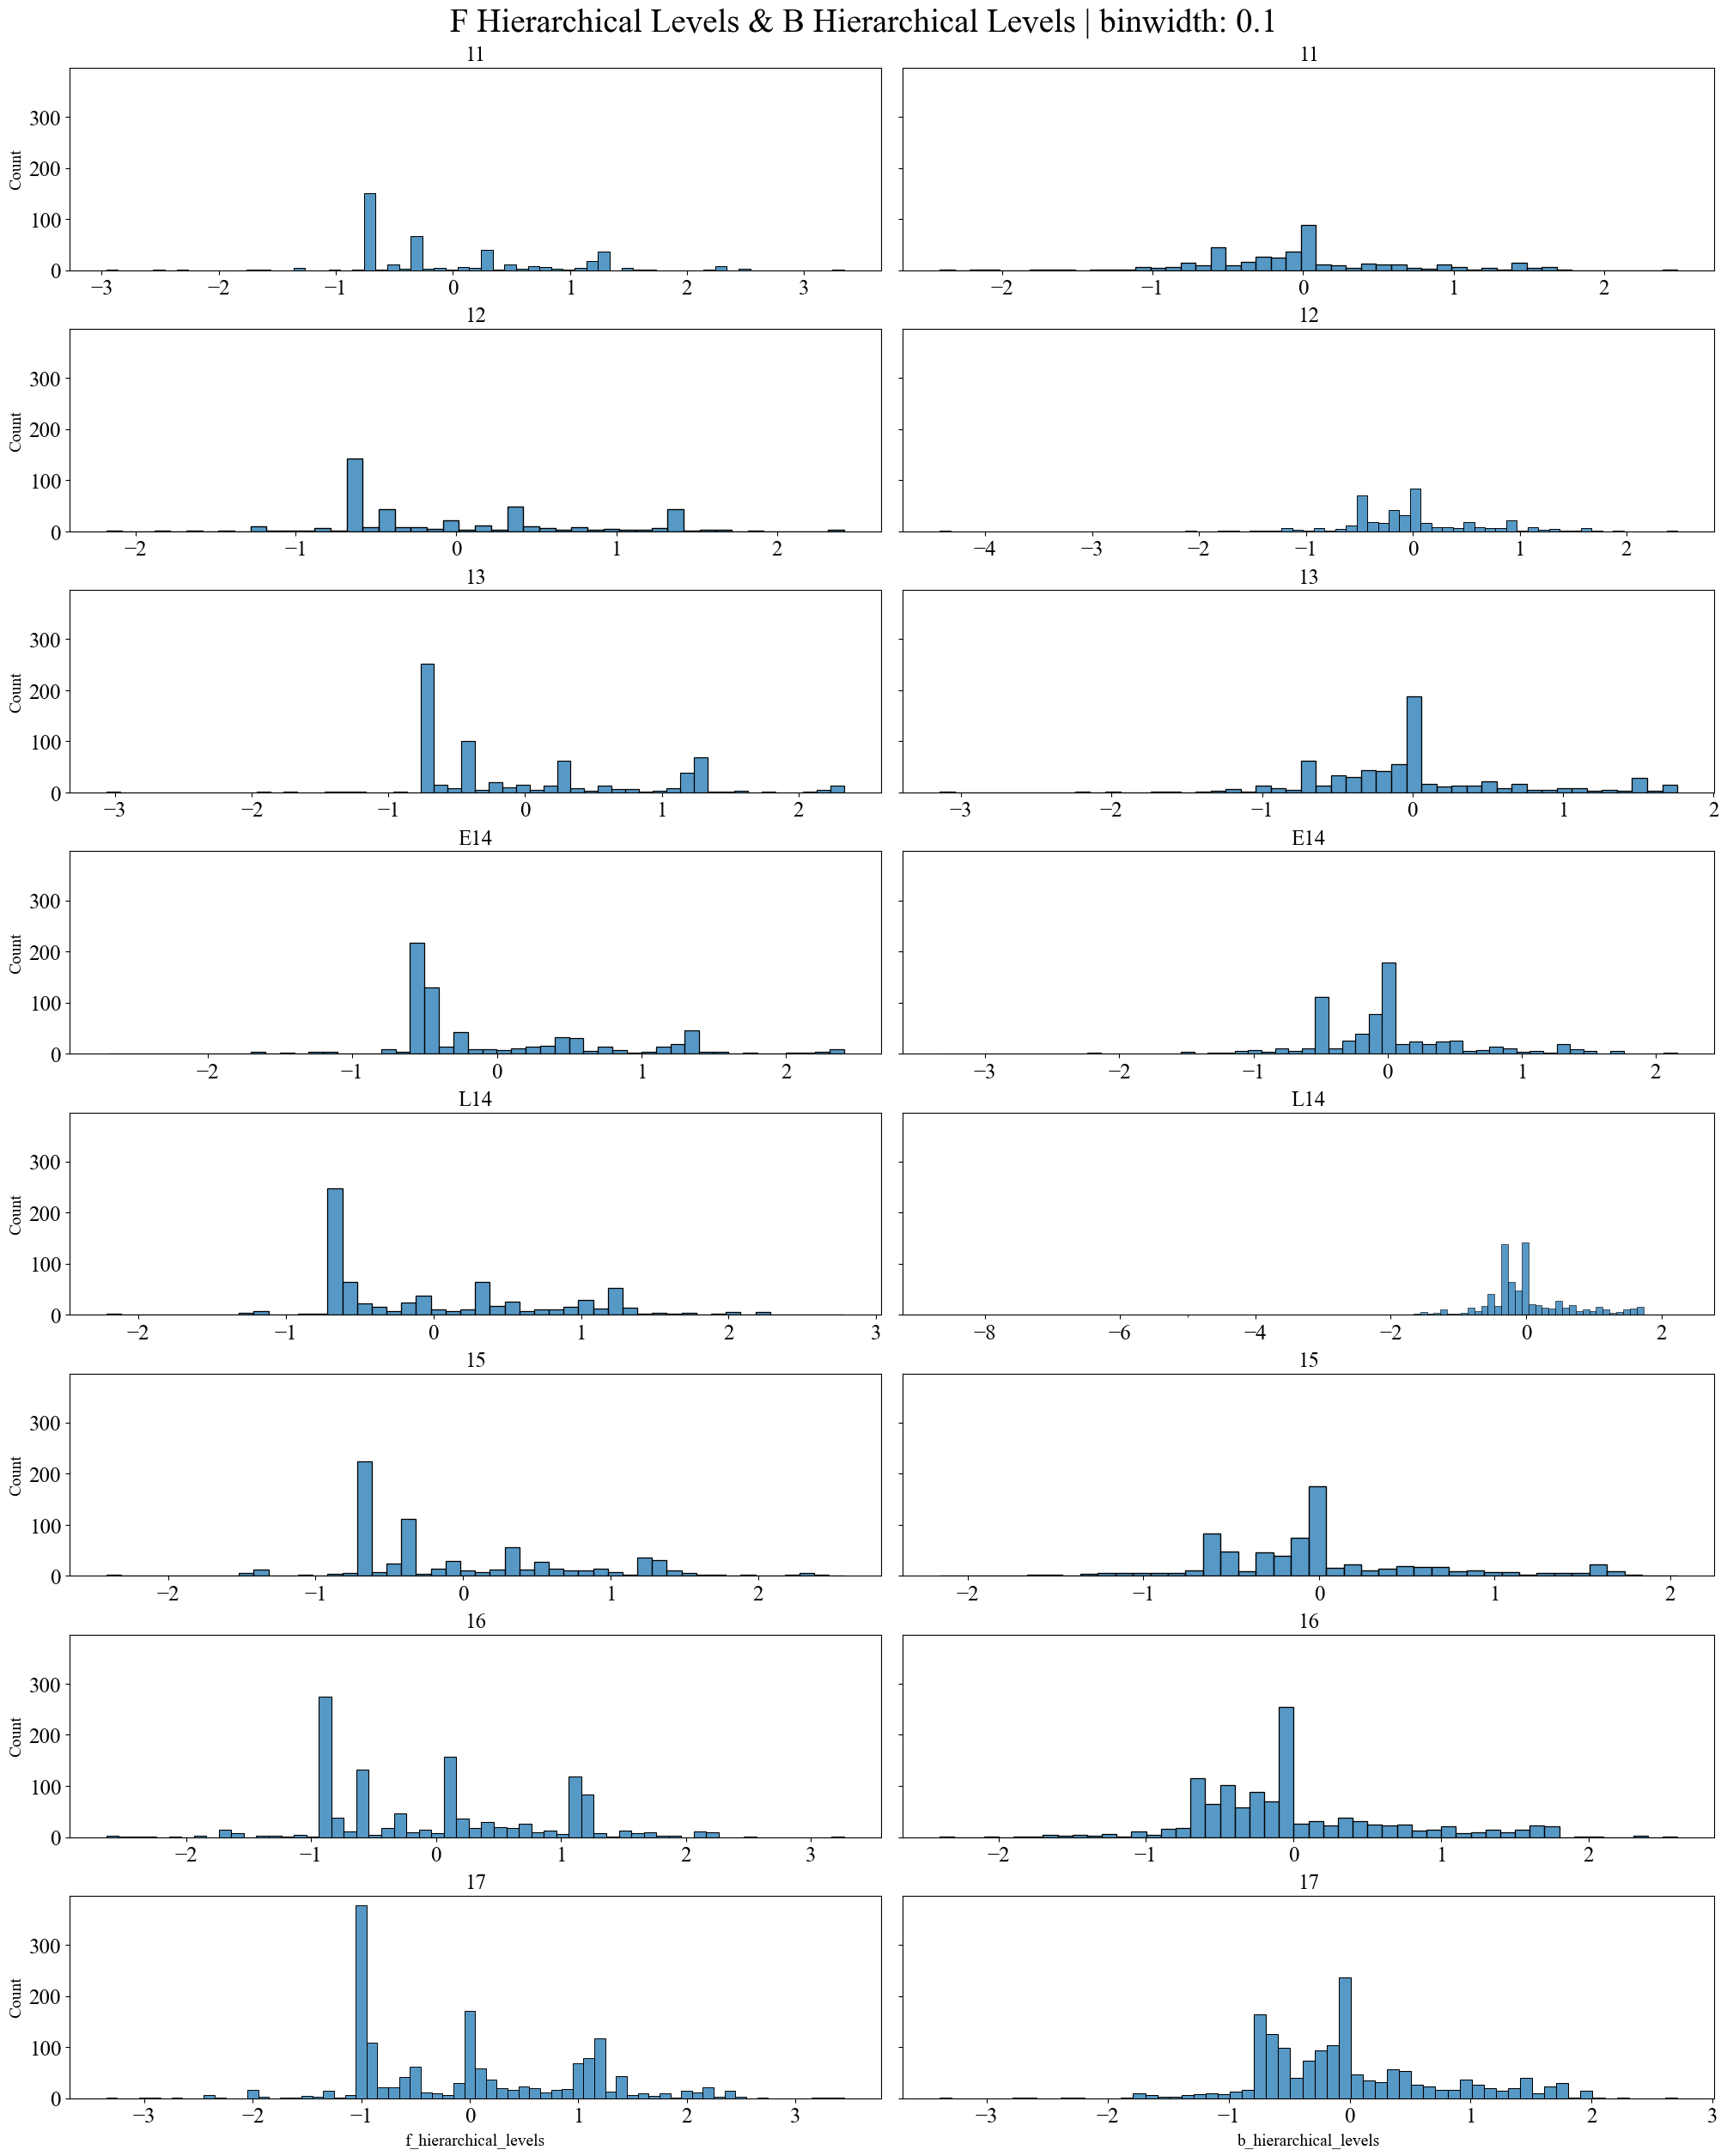

In [40]:
def plot_hirearchy_measure(h_measures_df, binwidth, func_names, ylim_dict=None):
    SMALL_SIZE = 18
    MEDIUM_SIZE = 14
    BIGGER_SIZE = 28

    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

    matplotlib.rcParams['font.serif'] = "Times New Roman"
    matplotlib.rcParams['font.family'] = "serif"
    sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})

    fig, axes = plt.subplots(nrows=len(cent_nets.keys()), ncols=2, constrained_layout=True,
        sharex=False, sharey=True, dpi=100, figsize=(20, 25))

    fig.suptitle('{} | binwidth: {}'.format(
        ' & '.join(func_names).replace('_', ' ').title(), binwidth
    ))
    
    cents = list(cent_nets.keys())
    
    for row, cent in tqdm(enumerate(cents)):

        h_levels_tmp = h_measures_df[h_measures_df['cent'] == cent]

        g = sns.histplot(
            data=h_levels_tmp, x=func_names[0],
            ax=axes[row, 0], binwidth=binwidth
        )
        g.set_title('{}'.format(cent), loc='center')
        
#         g.xaxis.set_minor_locator(tck.AutoMinorLocator(5))
        
        # write xlabel only for last plot in column
        if cent != cents[-1]:
            g.set(xlabel='')
        
        if False:
            g.set(ylim=(0, ylim_dict[binwidth]) #, xlim=(0, 1), 
                  #xlabel=covars_latex_dicts[x_col], ylabel=covars_latex_dicts[y_col]
            )
            pass
#         g.xaxis.set_major_locator(plt.MultipleLocator(1))
#         g.yaxis.set_major_locator(plt.MultipleLocator(100))
    #     g.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 2))
        g.xaxis.set_minor_locator(plt.MultipleLocator(2))
#         print(ylim_dict[binwidth])
        '''-------------------------------'''
        g = sns.histplot(
            data=h_levels_tmp, x= func_names[1],
            ax=axes[row, 1], binwidth=binwidth
        )
        g.set_title('{}'.format(cent), loc='center')
        
#         g.xaxis.set_minor_locator(tck.AutoMinorLocator(5))
        
        # write xlabel only for last plot in column
        if cent != cents[-1]:
            g.set(xlabel='')
        
        if False:
            g.set(ylim=(0, ylim_dict[binwidth]) #, xlim=(0, 1), 
                  #xlabel=covars_latex_dicts[x_col], ylabel=covars_latex_dicts[y_col]
            )
            pass
#         g.xaxis.set_major_locator(plt.MultipleLocator(1))
#         g.yaxis.set_major_locator(plt.MultipleLocator(100))
    #     g.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 2))
        g.xaxis.set_minor_locator(plt.MultipleLocator(5))

        pass
    pass

binwidth = [0.1, None][0]
# func_name = ['hierarchical_levels', 'forward_hierarchical_levels'][1]
func_names = [
    ('hierarchical_levels', 'f_hierarchical_levels'),
    ('hierarchical_levels', 'b_hierarchical_levels'),
    ('f_hierarchical_levels', 'b_hierarchical_levels'),
    
#     ('f_influence_centrality', 'f_hierarchical_levels')
][-1]
# ylim_dicts={
#     ('forward_hierarchical_levels weighted', 'backward_hierarchical_levels weighted'): {
#         0.25:300, 0.5: 250, 0.75: 300, 1.0: 350, None: 400},
#     ('hierarchical_levels weighted', 'forward_hierarchical_levels weighted'): {None: 400},
#     ('hierarchical_levels weighted', 'backward_hierarchical_levels weighted'): {None: 400},
# }

plot_hirearchy_measure(h_measures_df=h_measures_df, 
                       binwidth=binwidth, 
#                        ylim_dict=ylim_dicts[func_names], 
                       func_names=func_names)

In [41]:
h_measures_df.describe()

,hierarchical_levels,f_hierarchical_levels,b_hierarchical_levels,f_influence_centrality,b_influence_centrality,f_democracy_coefficient,b_democracy_coefficient,f_hierarchical_incoherence,b_hierarchical_incoherence,cent_num
count,6.518000e+03,6.518000e+03,6.518000e+03,6.518000e+03,6.518000e+03,6.518000e+03,6.518000e+03,6518.000000,6518.000000,6518.000000
mean,1.122828e-16,-8.830003e-17,-2.910631e-16,1.457598e-02,4.343359e-01,2.764971e-07,1.838832e-04,0.530711,0.744937,14.798972
std,6.804843e-01,8.855096e-01,6.933130e-01,1.198531e-01,4.957073e-01,3.928917e-07,3.428491e-04,0.046660,0.148211,1.826718
min,-2.537372e+00,-3.351448e+00,-8.665893e+00,-3.554824e-04,-8.127963e-04,-4.403930e-07,-5.773896e-07,0.473077,0.573256,11.000000
25%,-4.298691e-01,-6.711835e-01,-4.545174e-01,-4.192486e-06,-3.643015e-07,-1.042887e-07,-4.229552e-08,0.494857,0.673622,14.100000
50%,-9.642265e-02,-2.768654e-01,-4.990744e-02,2.560303e-07,2.509198e-05,4.135369e-07,1.088502e-07,0.518030,0.721417,15.000000
75%,4.826917e-01,6.133967e-01,2.554505e-01,6.433941e-06,1.000000e+00,5.980756e-07,7.384140e-07,0.538596,0.773098,16.000000
max,5.681760e+00,3.393603e+00,2.697442e+00,1.000000e+00,1.000003e+00,7.258097e-07,8.528535e-04,0.604803,1.240305,17.000000


In [ ]:
# cen = '11'
# plt.figure(figsize=(15,8))
# sns.histplot(data=h_measures_df[h_measures_df['cent'] == cent], x='f_influence_centrality')

In [42]:
h_measures_df.columns

Index(['node', 'hierarchical_levels', 'cent', 'f_hierarchical_levels',
       'b_hierarchical_levels', 'f_influence_centrality',
       'b_influence_centrality', 'f_democracy_coefficient',
       'b_democracy_coefficient', 'f_hierarchical_incoherence',
       'b_hierarchical_incoherence', 'cent_num'],
      dtype='object')

## Influence Centrality

In [44]:
'''Forward'''
heads_f_influence_centrality = h_measures_df[h_measures_df['f_influence_centrality'] > 0.1].groupby(['node', 'cent']).agg(count = ('cent', np.size))

head_f_influence = (
    heads_f_influence_centrality
    .reset_index()
    .pivot(index=['node'], columns='cent', values='count')
    .fillna(0)
)

head_f_influence['sum'] = head_f_influence.sum(axis=1)

head_f_influence = head_f_influence.sort_values(by=['sum'], ascending=False)

if True:
    head_f_influence.to_excel(path_dataset_dir + 'influence_cent_forward_high_0.1.xlsx')

head_f_influence

cent,11,12,13,15,16,17,E14,L14,sum
node,,,,,,,,,
MV wellen,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8.0
AX sin,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8.0
AX werden,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8.0
V werden,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8.0
MV sollen,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8.0
MV müssen,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,7.0
MV mögen,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,6.0
MV können,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,5.0
V kommen,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,3.0


In [45]:
'''Backward'''
heads_f_influence_centrality = h_measures_df[h_measures_df['b_influence_centrality'] > 0.1].groupby(['node', 'cent']).agg(count = ('cent', np.size))

head_f_influence = (
    heads_f_influence_centrality
    .reset_index()
    .pivot(index=['node'], columns='cent', values='count')
    .fillna(0)
)

head_f_influence['sum'] = head_f_influence.sum(axis=1)

head_f_influence = head_f_influence.sort_values(by=['sum'], ascending=False)

if True:
    head_f_influence.to_excel(path_dataset_dir + 'influence_cent_backward_high_0.1.xlsx')

head_f_influence

cent,11,12,13,15,16,17,E14,L14,sum
node,,,,,,,,,
AJ all,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8.0
AD so,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8.0
AJ dise,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8.0
AJ unser,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8.0
AR der,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,7.0
...,...,...,...,...,...,...,...,...,...
AJ sælig,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
AJ sätzig,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
AJ swære,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [46]:
[n for n in nodes_all_cent if 'werden' in n]

['PCPS werden', 'AX werden', 'V werden', 'IV werden']

In [48]:
h_measures_df

,node,hierarchical_levels,cent,f_hierarchical_levels,b_hierarchical_levels,f_influence_centrality,b_influence_centrality,f_democracy_coefficient,b_democracy_coefficient,f_hierarchical_incoherence,b_hierarchical_incoherence,cent_num
0,AX werden,-1.322059,11,-1.678203,0.965916,1.000000e+00,9.098386e-10,1.098341e-07,-1.298933e-07,0.533920,0.763671,11.0
1,PP er,0.488087,11,-0.438014,-1.414188,-8.978796e-09,-2.192297e-05,1.098341e-07,-1.298933e-07,0.533920,0.763671,11.0
2,AX sin,-1.695372,11,-2.319056,1.071687,1.000000e+00,-1.146232e-08,1.098341e-07,-1.298933e-07,0.533920,0.763671,11.0
3,PCPS werden,-1.138701,11,-1.319056,0.958345,-5.256178e-07,-8.508693e-09,1.098341e-07,-1.298933e-07,0.533920,0.763671,11.0
4,V werden,-0.895725,11,-1.276866,0.514583,1.000000e+00,-4.383868e-07,1.098341e-07,-1.298933e-07,0.533920,0.763671,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6513,AJ unein,-0.285393,17,-0.578413,-0.007627,-1.425639e-07,1.000000e+00,7.258097e-07,7.384140e-07,0.604803,0.773098,17.0
6514,AJ ungedultig,-0.285393,17,-0.578413,-0.007627,-1.425639e-07,1.000000e+00,7.258097e-07,7.384140e-07,0.604803,0.773098,17.0
6515,AJ unlustig,-0.285393,17,-0.578413,-0.007627,-1.425639e-07,1.000000e+00,7.258097e-07,7.384140e-07,0.604803,0.773098,17.0
6516,N gleich,-0.285393,17,-0.578413,-0.007627,-1.425639e-07,1.000000e+00,7.258097e-07,7.384140e-07,0.604803,0.773098,17.0


[None, None]

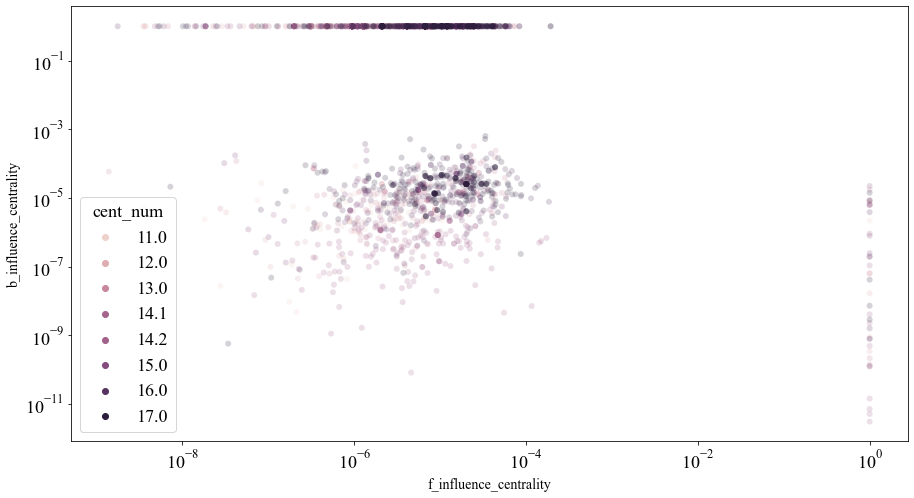

In [49]:
plt.figure(figsize=(15,8))

ax = sns.scatterplot(data=h_measures_df, x='f_influence_centrality', y='b_influence_centrality', 
                     hue='cent_num', alpha=0.2, linewidth=0, legend='full')

ax.set(xscale='log', yscale='log')

# h_measures_df['f_influence_centrality']

Text(0.5, 1.0, 'f_influence_centrality')

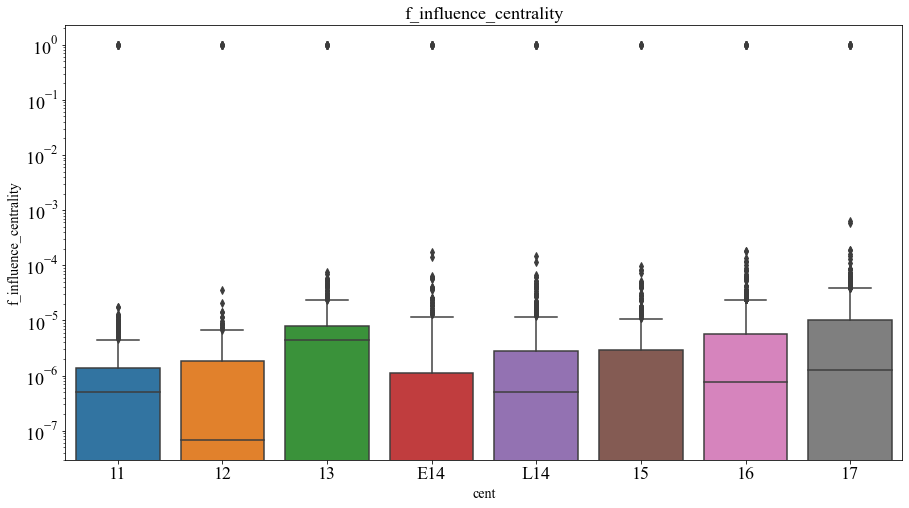

In [50]:
measure = ['f_influence_centrality'][0]

plt.figure(figsize=(15,8))
ax = sns.boxplot(data=h_measures_df, y=measure, x='cent')
ax.set(yscale="log")
ax.set_title(measure)

In [236]:
h_measures_df

,node,hierarchical_levels,cent,f_hierarchical_levels,b_hierarchical_levels,f_influence_centrality,b_influence_centrality,f_democracy_coefficient,b_democracy_coefficient,f_hierarchical_incoherence,b_hierarchical_incoherence
0,AX werden,-1.322059,11,-1.678203,0.965916,1.000000e+00,9.098386e-10,1.098341e-07,-1.298933e-07,0.533920,0.763671
1,PP er,0.488087,11,-0.438014,-1.414188,-8.978796e-09,-2.192297e-05,1.098341e-07,-1.298933e-07,0.533920,0.763671
2,AX sin,-1.695372,11,-2.319056,1.071687,1.000000e+00,-1.146232e-08,1.098341e-07,-1.298933e-07,0.533920,0.763671
3,PCPS werden,-1.138701,11,-1.319056,0.958345,-5.256178e-07,-8.508693e-09,1.098341e-07,-1.298933e-07,0.533920,0.763671
4,V werden,-0.895725,11,-1.276866,0.514583,1.000000e+00,-4.383868e-07,1.098341e-07,-1.298933e-07,0.533920,0.763671
...,...,...,...,...,...,...,...,...,...,...,...
6515,AJ unein,-0.285393,17,-0.578413,-0.007627,-1.425639e-07,1.000000e+00,7.258097e-07,7.384140e-07,0.604803,0.773098
6516,AJ ungedultig,-0.285393,17,-0.578413,-0.007627,-1.425639e-07,1.000000e+00,7.258097e-07,7.384140e-07,0.604803,0.773098
6517,AJ unlustig,-0.285393,17,-0.578413,-0.007627,-1.425639e-07,1.000000e+00,7.258097e-07,7.384140e-07,0.604803,0.773098
6518,N gleich,-0.285393,17,-0.578413,-0.007627,-1.425639e-07,1.000000e+00,7.258097e-07,7.384140e-07,0.604803,0.773098


<AxesSubplot:xlabel='f_hierarchical_levels', ylabel='Count'>

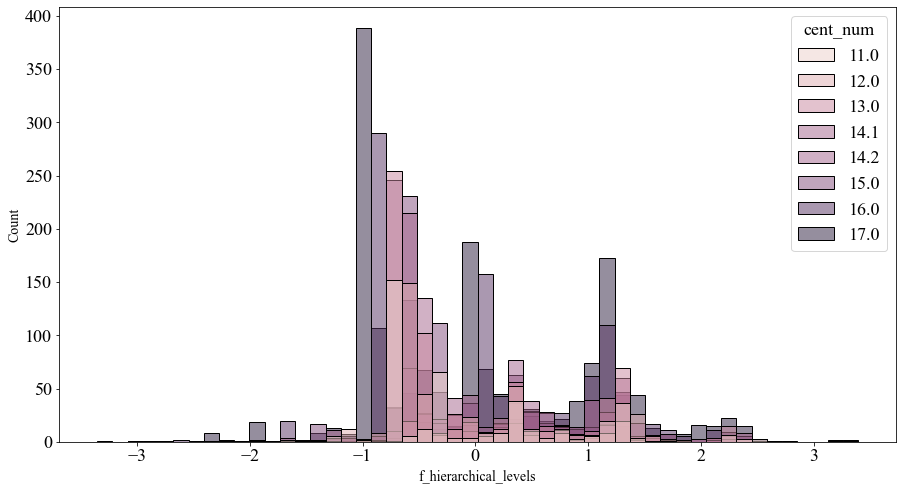

In [52]:
plt.figure(figsize=(15,8))
sns.histplot(data=h_measures_df, x='f_hierarchical_levels', hue='cent_num')

<AxesSubplot:xlabel='hierarchical_levels', ylabel='Count'>

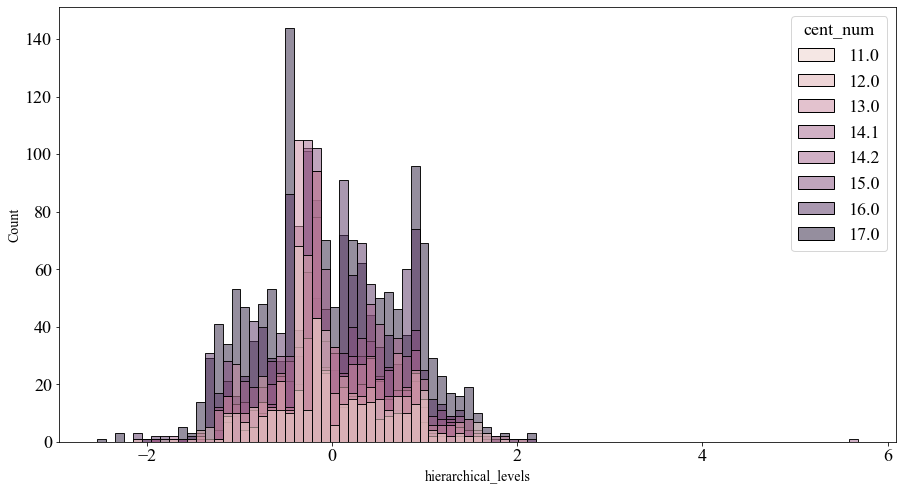

In [51]:
plt.figure(figsize=(15,8))
sns.histplot(data=h_measures_df, x='hierarchical_levels', hue='cent_num')

<AxesSubplot:xlabel='hierarchical_levels NOT weighted', ylabel='Count'>

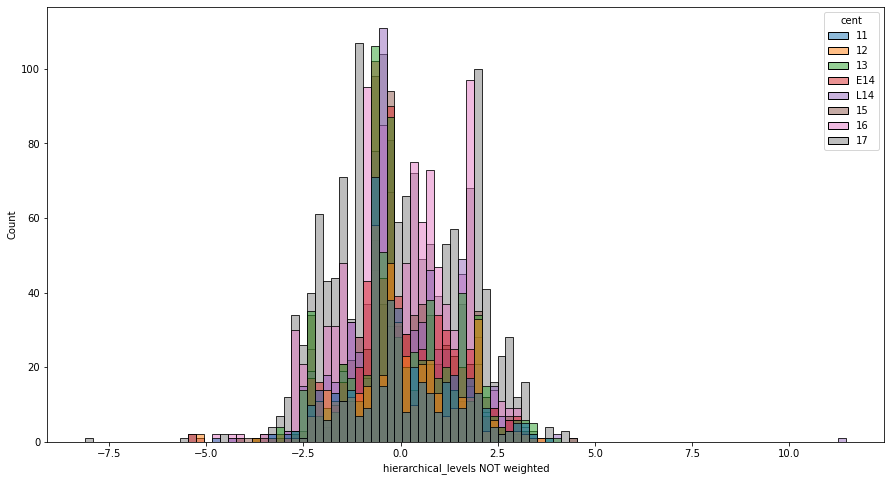

In [75]:
plt.figure(figsize=(15,8))
sns.histplot(data=h_levels_df, x='hierarchical_levels NOT weighted', hue='cent')

In [76]:
# plt.figure(figsize=(15,8))
# sns.histplot(
#     data=h_levels_df[h_levels_df['cent'].isin(['11', '17'])], 
#     x='hierarchical_levels', hue='cent')

In [77]:
# sns.histplot(data=h_levels_df, x='hierarchical_levels', hue='cent')

fig = px.histogram(h_levels_df, x="hierarchical_levels weighted", color="cent", barmode="overlay")

fig.update_xaxes(range=[-9, +12], autorange=False)
fig.update_yaxes(range=[0, 110], autorange=False)

# fig.show()

pio.show(fig, renderer='browser', validate=True)
# fig.write_html(file_save)

## Global Measures: Democracy Coeff and Hierarchical Incoherence

In [53]:
# %config Completer.use_jedi = False
# G.nodes
h_measures_df[h_measures_df['node'] == 'IV werden']

,node,hierarchical_levels,cent,f_hierarchical_levels,b_hierarchical_levels,f_influence_centrality,b_influence_centrality,f_democracy_coefficient,b_democracy_coefficient,f_hierarchical_incoherence,b_hierarchical_incoherence,cent_num
8,IV werden,-1.337286,11,-1.276792,1.397781,5.749452e-08,-2.422956e-09,1.098341e-07,-1.298933e-07,0.533920,0.763671,11.0
423,IV werden,-1.238680,12,-1.011539,1.465820,-2.670189e-08,-1.535494e-08,-1.042887e-07,4.113768e-09,0.518030,1.240305,12.0
872,IV werden,-1.188825,13,-1.197342,1.180308,-7.948921e-07,-2.443671e-07,5.980756e-07,1.088502e-07,0.485214,0.773451,13.0
1568,IV werden,-1.141492,E14,-1.206588,1.076395,-2.462987e-08,4.676698e-10,-4.403930e-07,8.528535e-04,0.494857,0.721417,14.1
2263,IV werden,-1.198101,L14,-1.018925,1.377276,-2.903940e-08,3.565519e-09,-1.831064e-07,7.942777e-04,0.501725,0.663054,14.2
3027,IV werden,-1.125398,15,-1.023850,1.226946,-6.456216e-07,-3.282053e-08,2.658316e-07,-4.229552e-08,0.473077,0.573256,15.0
3763,IV werden,-1.284026,16,-1.248980,1.319072,-1.663660e-07,-1.299338e-08,4.135369e-07,-5.773896e-07,0.538596,0.673622,16.0
4951,IV werden,-1.578886,17,-1.460430,1.697342,4.340804e-08,-3.135264e-08,7.258097e-07,7.384140e-07,0.604803,0.773098,17.0


In [54]:
G.edges[('AX werden', 'IV erben')]
gh.node_backward_influence_centrality(G, 'IV werden', weight='frequency')

-3.135263537679123e-08

In [55]:
dem_forw_df = []

for cent, G in tqdm(cent_nets.items()):
    FHD_adj, FHD_mean, FHD_std = gh.forward_hierarchical_incoherence(G, weight='frequency')
    
    hierarchical_level_vector, influence_centrality_vector, hierarchical_diff_adj_sparse, democracy_coefficient, hierarchical_incoherence = gh.forward_hierarchical_metrics(G, weight='frequency')
    
    dem_forw_df.append(
        {
            'cent': cent,
            'forward_hierarchical_incoherence avg': FHD_mean,
            'forward_hierarchical_incoherence std': FHD_std,
            'forward_democracy_coefficient': gh.forward_democracy_coefficient(
                G, weight='frequency'),
            'democracy_coefficient': democracy_coefficient,
            'hierarchical_incoherence': hierarchical_incoherence
        }
    )
    
dem_forw_df = pd.DataFrame(dem_forw_df)
dem_forw_df['cent_num'] = dem_forw_df['cent'].map(cent_to_num)
dem_forw_df

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:06<00:00,  1.32it/s]


,cent,forward_hierarchical_incoherence avg,forward_hierarchical_incoherence std,forward_democracy_coefficient,democracy_coefficient,hierarchical_incoherence,cent_num
0,11,1.000000,0.533920,1.098341e-07,1.098341e-07,0.533920,11.0
1,12,1.000000,0.518030,-1.042887e-07,-1.042887e-07,0.518030,12.0
2,13,0.999999,0.485214,5.980756e-07,5.980756e-07,0.485214,13.0
3,E14,1.000000,0.494857,-4.403930e-07,-4.403930e-07,0.494857,14.1
4,L14,1.000000,0.501725,-1.831064e-07,-1.831064e-07,0.501725,14.2
5,15,1.000000,0.473077,2.658316e-07,2.658316e-07,0.473077,15.0
6,16,1.000000,0.538596,4.135369e-07,4.135369e-07,0.538596,16.0
7,17,0.999999,0.604803,7.258097e-07,7.258097e-07,0.604803,17.0


<AxesSubplot:xlabel='hierarchical_incoherence', ylabel='democracy_coefficient'>

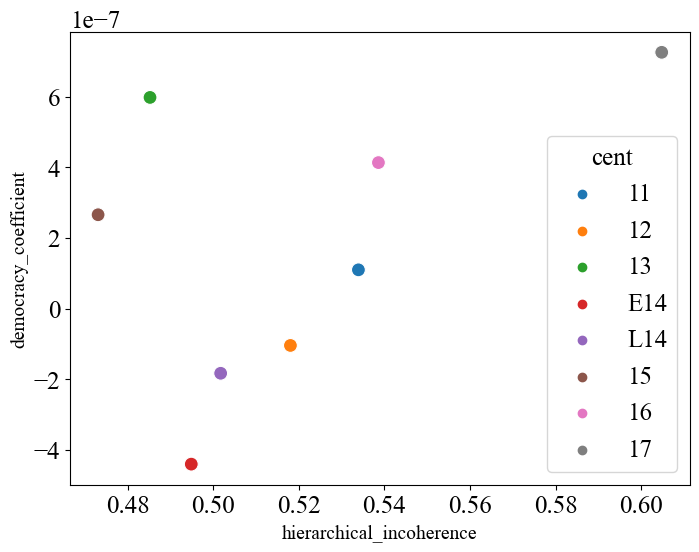

In [56]:
plt.figure(figsize=(8, 6), dpi=100)
sns.scatterplot(data=dem_forw_df, x="hierarchical_incoherence", y="democracy_coefficient", hue='cent',
               s=100, legend='full')

In [62]:
dem_forw_df

,cent,forward_hierarchical_incoherence avg,forward_hierarchical_incoherence std,forward_democracy_coefficient,democracy_coefficient,hierarchical_incoherence,cent_num
0,11,1.000000,0.533920,1.098341e-07,1.098341e-07,0.533920,11.0
1,12,1.000000,0.518030,-1.042887e-07,-1.042887e-07,0.518030,12.0
2,13,0.999999,0.485214,5.980756e-07,5.980756e-07,0.485214,13.0
3,E14,1.000000,0.494857,-4.403930e-07,-4.403930e-07,0.494857,14.1
4,L14,1.000000,0.501725,-1.831064e-07,-1.831064e-07,0.501725,14.2
5,15,1.000000,0.473077,2.658316e-07,2.658316e-07,0.473077,15.0
6,16,1.000000,0.538596,4.135369e-07,4.135369e-07,0.538596,16.0
7,17,0.999999,0.604803,7.258097e-07,7.258097e-07,0.604803,17.0


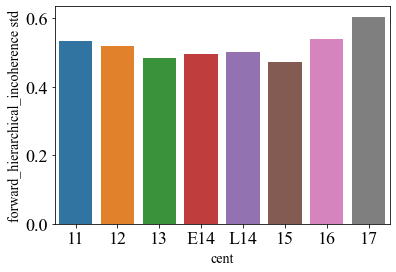

In [61]:
ax = sns.barplot(x="cent", y="forward_hierarchical_incoherence std", data=dem_forw_df)

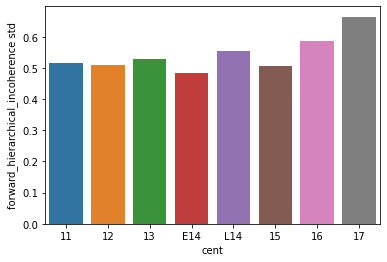

In [32]:
'UNWEIGHTED'

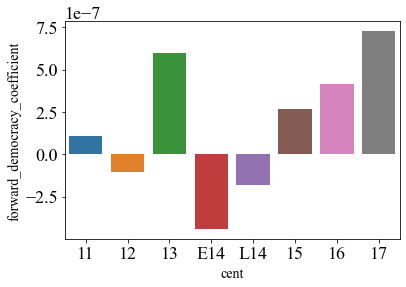

In [60]:
ax = sns.barplot(x="cent", y="forward_democracy_coefficient", data=dem_forw_df)

## Challenges

- https://stackoverflow.com/questions/57458789/get-bin-width-used-for-seaborn-plot
- ITS SO GOOD: https://jakevdp.github.io/PythonDataScienceHandbook/04.10-customizing-ticks.html
- https://stackoverflow.com/questions/56605113/how-to-set-x-axis-ticklabels-in-a-seaborn-plot

# [OLD] yFiles Hierarchical Layout

In [69]:
path_yfiles_layout = 'D:/GoogleDrive/Research/Linguistic project/German/data/Hierarchical Layout yfiles/'

path_networks = OrderedDict()

path_networks['11'] = path_yfiles_layout + "/Cent11.cyjs" 
path_networks['12'] = path_yfiles_layout + "/Cent12.cyjs" 
path_networks['13'] = path_yfiles_layout + "/Cent13.cyjs" 
path_networks['14E'] = path_yfiles_layout + "/Cent14E.cyjs" 

path_networks['14L'] = path_yfiles_layout + "/Cent14L.cyjs" 
path_networks['15'] = path_yfiles_layout + "/Cent15.cyjs" 
path_networks['16'] = path_yfiles_layout + "/Cent16.cyjs" 
path_networks['17'] = path_yfiles_layout + "/Cent17.cyjs" 

In [119]:
layouts = OrderedDict()
cen_layers = {}

for cent, path_layout in path_networks.items():
    f = open(path_layout, "r", encoding='utf-8')
    layouts[cent] = json.loads(f.read())
    
    cen_layers[cent] = []
    
    for node in layouts[cent]['elements']['nodes']:
        
        cen_layers[cent].append({
            'name': node['data']['name'],
            'x': node['position']['x'],
            'y': node['position']['y'],
            'y_round': round(node['position']['y'])
        })
        pass
    
    cen_layers[cent] = pd.DataFrame(cen_layers[cent])
    """Now convert unique y value to sequential layer number"""
    map_y_val_to_layer_num = {
        y: l + 1 for l, y in enumerate(sorted(set(cen_layers[cent]['y_round'])))
    }
    
    cen_layers[cent]['layer'] = cen_layers[cent]['y_round'].map(map_y_val_to_layer_num)
    
    cen_layers[cent] = cen_layers[cent].sort_values('layer').reset_index(drop=True)
#     break
    pass
# del layers
map_y_val_to_layer_num
cen_layers['17'].columns
# cen_layers.keys()

Index(['name', 'x', 'y', 'y_round', 'layer'], dtype='object')

In [121]:
cen_layer_count = []
for cen, cen_layer in cen_layers.items():
    cen_layer_count.append({
        'cent': cen,
        'num layers': cen_layer['layer'].max()
    })
    pass

cen_layer_count = pd.DataFrame(cen_layer_count)

cen_layers['cen_layer_count'] = cen_layer_count

cen_layers['cen_layer_count']

,cent,num layers
0,11,8
1,12,8
2,13,13
3,14E,8
4,14L,13
5,15,10
6,16,18
7,17,28


[(0.0, 30.0), Text(0.5, 1.0, 'Number of Layers in Each Century')]

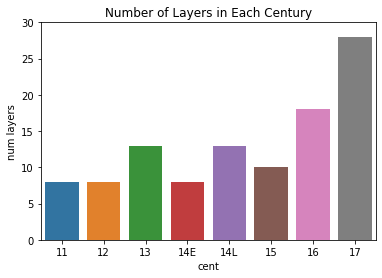

In [136]:
%matplotlib inline

ax=sns.barplot(x="cent", y="num layers", data=cen_layer_count)
ax.set(ylim=(0, 30), title='Number of Layers in Each Century')

In [137]:
save_xls(dfs_dict=cen_layers, 
         xls_path=path_yfiles_layout + '/all_cent_layers_yfiles.xlsx', 
         open=True)

# [OLD] Graph Hierarchy 
- How to draw netwrokx graph https://faculty.math.illinois.edu/~hirani/cbmg/graphs.html
- Add x-y axis when drawing with NetworkX https://stackoverflow.com/questions/56994061/how-to-make-x-and-y-axes-appear-when-using-networkx-and-matplotlib
- A cool toturial for visualization https://www.datacamp.com/community/tutorials/networkx-python-graph-tutorial

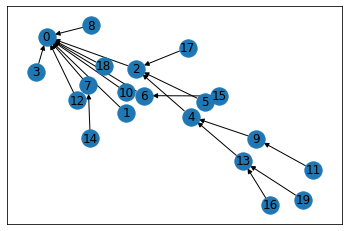

In [22]:

graph = nx.gnr_graph(20, 0.4)
nx.draw_networkx(graph)

In [24]:
l = list(zip(
    graph.nodes(),
#     gh.forward_hierarchical_levels(graph)
    gh.hierarchical_levels(graph)
))

l.sort(key=lambda x: x[1])
l

[(11, -3.0644356955377443),
 (16, -2.759623797025019),
 (19, -2.759623797025019),
 (9, -1.0644356955410164),
 (13, -0.7596237970287615),
 (14, -0.713254593162531),
 (15, -0.713254593162531),
 (5, -0.5697725284144661),
 (17, -0.5697725284144661),
 (1, 0.7234908135033875),
 (3, 0.7234908135033875),
 (8, 0.7234908135033875),
 (10, 0.7234908135033875),
 (12, 0.7234908135033875),
 (18, 0.7234908135033875),
 (4, 1.0879702537436602),
 (6, 1.2867454066645039),
 (7, 1.2867454066645039),
 (2, 1.9828083987402958),
 (0, 2.9885826784782665)]

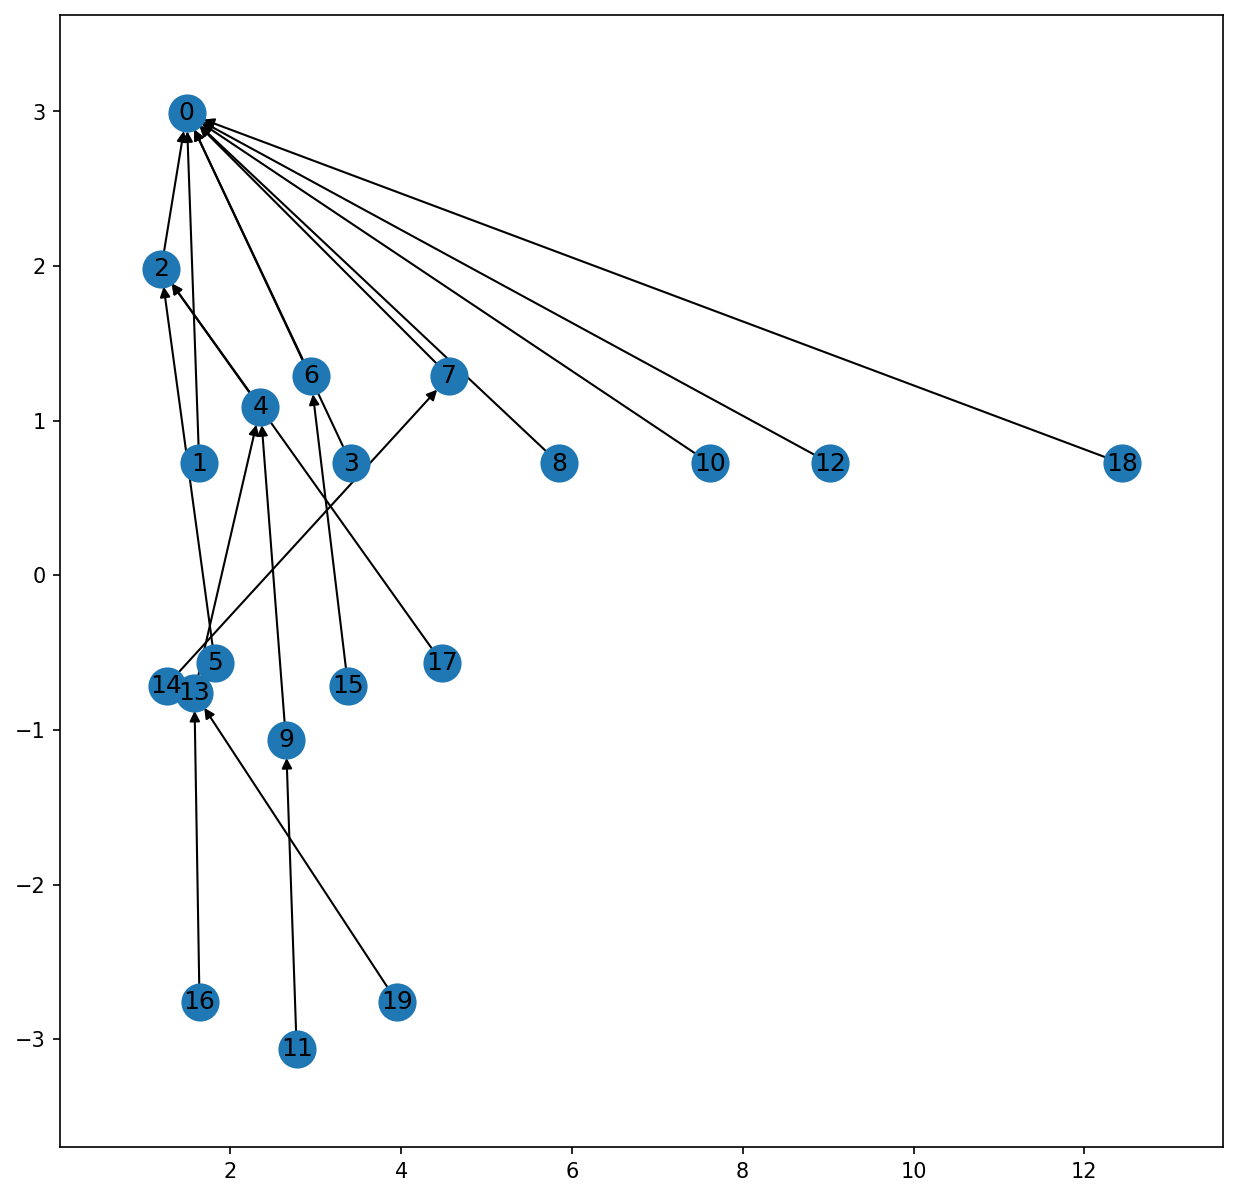

<Figure size 864x864 with 0 Axes>

In [25]:
level_dict = {}
level_num = 0
prev_layer_level = None
offset = 0

for node, level in l:
    if prev_layer_level is not None:
        offset = 1 - (level - prev_layer_level)
    
#     print('l: ', level, 'o: ', offset)
    
    if level not in level_dict:
        level_dict[level] = []
        level_num += 1
        prev_layer_level = level
        pass
    
    level_dict[level].append(node)
#     print(level + (np.sign(level) * 1))
    graph.nodes[node]['pos'] = (
        (len(level_dict[level]) * 2) + random.uniform(-1, 1),
        level 
    )
    pass

# plt.figure(3,figsize=(12,12)) 

fig, ax = plt.subplots()
fig.set_dpi(150)
fig.set_size_inches(10,10)
pos=nx.get_node_attributes(graph,'pos')

plt.figure(3,figsize=(12,12)) 

nx.draw_networkx(graph, pos, ax=ax)

ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)

In [26]:
print('levels: ', len(level_dict))

levels:  11


In [145]:
node_l_dict = dict(l)
node_l_dict[0] - node_l_dict[1]

-0.5258583535426631

In [140]:
gh.forward_hierarchical_differences(graph)


array([[ 0.        , -0.52585835,  1.48484413,  0.        ,  0.        ,
         0.        ,  0.69444045,  0.        ,  0.        ,  0.        ,
         1.48484413,  0.        ,  0.        ,  1.48484413,  0.        ,
         0.        ,  0.89204137,  1.48484413,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.6795719 ,
         0.25233443,  0.        ,  0.        ,  

In [157]:
(hierarchical_differences_sparse, 
 hierarchical_differences_mean, 
 hierarchical_differences_std) = gh.forward_hierarchical_incoherence(graph)

"""The standard deviation of the distribution is known as the forward hierarchical incoherence and is an important metric which gives a measure of a network's organisation and structure."""
print('mean:', hierarchical_differences_mean, 'std:' , hierarchical_differences_std)

mean: 1.0000000000484295 std: 0.4923440574492365


In [158]:
gh.forward_democracy_coefficient(graph)

-4.8429482646383804e-11

In [166]:
for node in graph.nodes:
    print(node, gh.node_forward_influence_centrality(graph, node))

0 -1.421169848470072e-10
1 1.856170772640553e-11
2 1
3 -5.46229728115577e-13
4 4.54081217071689e-14
5 5.0959236830294685e-14
6 1.98507876802978e-11
7 1
8 1
9 1
10 1
11 1
12 1
13 1
14 1
15 1
16 1.838296181944088e-11
17 1
18 1
19 1


In [167]:
gh.forward_influence_centrality(graph)


array([[-1.42116985e-10],
       [ 1.85617077e-11],
       [ 1.00000000e+00],
       [-5.46229728e-13],
       [ 4.54081217e-14],
       [ 5.09592368e-14],
       [ 1.98507877e-11],
       [ 1.00000000e+00],
       [ 1.00000000e+00],
       [ 1.00000000e+00],
       [ 1.00000000e+00],
       [ 1.00000000e+00],
       [ 1.00000000e+00],
       [ 1.00000000e+00],
       [ 1.00000000e+00],
       [ 1.00000000e+00],
       [ 1.83829618e-11],
       [ 1.00000000e+00],
       [ 1.00000000e+00],
       [ 1.00000000e+00]])

In [168]:
gh.hierarchical_levels(graph)


array([ 3.44923861,  2.97509697,  0.96439448,  0.97509697, -0.70447493,
       -0.27723747,  1.75479816, -0.24520184, -2.27723747, -0.24520184,
        0.96439448, -2.70447493, -2.27723747,  0.96439448, -2.27723747,
       -1.55894986,  1.55719724,  0.96439448, -1.55894986, -0.44280276])